In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, ZeroPadding2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import os
import numpy as np
from keras.preprocessing import image

In [ ]:
width=150
height=220
kernel_size=(3,3)

model1 = Sequential([
  Conv2D(16, kernel_size, activation='relu', input_shape=(width, height, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, kernel_size, activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, kernel_size, activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, kernel_size, activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, kernel_size, activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [44]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('dataset', target_size = (150, 220), batch_size = 32, class_mode = 'binary')

test_set = test_datagen.flow_from_directory('sample_Signature', target_size = (150, 220), batch_size = 32, class_mode = 'binary')

model1.fit_generator(training_set, steps_per_epoch = 1712, epochs = 10, validation_data = test_set, validation_steps = 800)

Found 1712 images belonging to 2 classes.
Found 282 images belonging to 2 classes.
Epoch 1/10
1712/1712 [==============================] - 2579s 2s/step - loss: 0.4045 - accuracy: 0.7928 - val_loss: 1.1367 - val_accuracy: 0.6843
Epoch 2/10
1712/1712 [==============================] - 2544s 1s/step - loss: 0.0843 - accuracy: 0.9699 - val_loss: 1.5947 - val_accuracy: 0.7271
Epoch 3/10
1712/1712 [==============================] - 2543s 1s/step - loss: 0.0425 - accuracy: 0.9852 - val_loss: 2.2554 - val_accuracy: 0.7198
Epoch 4/10
1712/1712 [==============================] - 2780s 2s/step - loss: 0.0303 - accuracy: 0.9892 - val_loss: 2.3954 - val_accuracy: 0.7131
Epoch 5/10
1712/1712 [==============================] - 2506s 1s/step - loss: 0.0235 - accuracy: 0.9924 - val_loss: 2.0960 - val_accuracy: 0.7235
Epoch 6/10
1712/1712 [==============================] - 2441s 1s/step - loss: 0.0219 - accuracy: 0.9926 - val_loss: 1.3749 - val_accuracy: 0.7054
Epoch 7/10
1712/1712 [===================

In [46]:
model1.save('cnn_model.h5')
model1.save('cnn_model1.model')

In [1]:
from keras.models import load_model
model = load_model('cnn_model.h5')

Using TensorFlow backend.


# Test Data

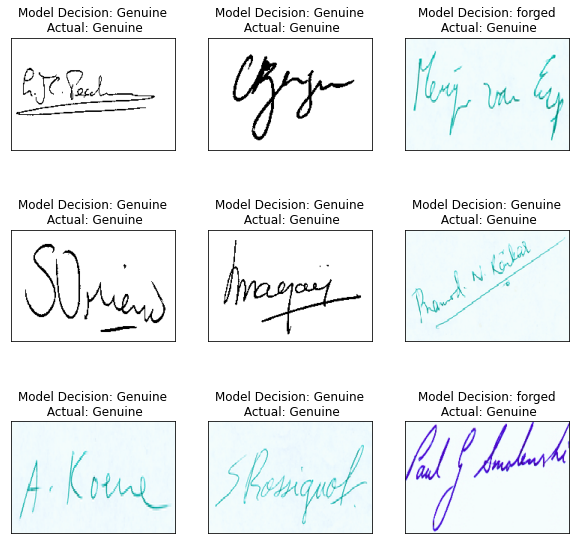

In [9]:
fig=plt.figure(figsize=(10,10))
i=1
for filename in os.listdir('test/genuine'):
    file= 'test/genuine/{}'.format(filename)
    
    test_image = image.load_img(file, target_size = (150, 220))
    
    fig.add_subplot(3,3,i)
    plt.imshow(test_image)
    plt.xticks([])
    plt.yticks([])
    
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    if result[0][0] >= 0.5:
        prediction = 'Genuine'
    else:
        prediction = 'forged'
    
    i=i+1
    plt.title('Model Decision: '+prediction+'\n Actual: Genuine')

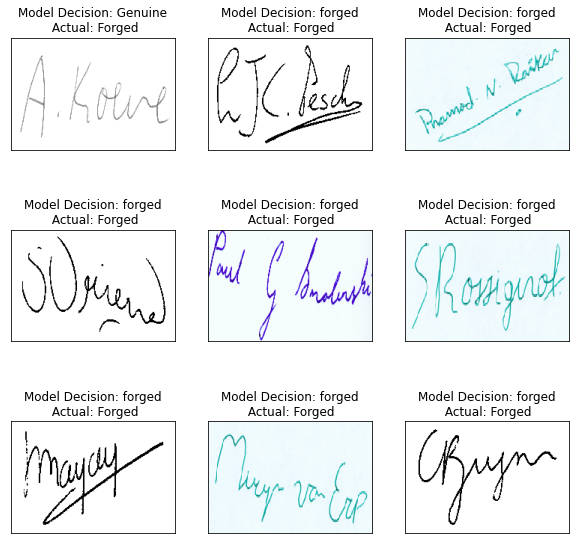

In [11]:
fig=plt.figure(figsize=(10,10))
i=1
for filename in os.listdir('test/forged'):
    file= 'test/forged/{}'.format(filename)
    
    test_image = image.load_img(file, target_size = (150, 220))
    
    fig.add_subplot(3,3,i)
    plt.imshow(test_image)
    plt.xticks([])
    plt.yticks([])
    
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    if result[0][0] >= 0.5:
        prediction = 'Genuine'
    else:
        prediction = 'forged'
    
    i=i+1
    plt.title('Model Decision: '+prediction+'\n Actual: Forged')